In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv('C:\\Users\\Ayushi Asthana\\Desktop\\vidooly\\ad_vs_org\\final_combined_organic_duration.csv')

C:\Users\Ayushi Asthana\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,22,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#data['publishedAt'].dt.time
data['publishedAt'] = pd.to_datetime(data['publishedAt'])

In [4]:
data['publishedAt']=data['publishedAt'].dt.date

In [5]:
data['publishedAt'].head()

0    2018-01-16
1    2018-07-20
2    2018-02-27
3    2018-01-31
4    2016-11-15
Name: publishedAt, dtype: object

# Preprocessing Data

In [6]:
import datetime
def get_age(date):
    #presentdate=01-01-2019
    presentdate = datetime.date(2019, 2,1)
    k=presentdate-date
    print(k)
    return k
#l=datetime.datetime(2019,2,2)
#n=get_age(l)
#print(n)
    

In [7]:
data['videoAge']=get_age(data['publishedAt'])

0         381 days
1         196 days
2         339 days
3         366 days
4         808 days
5         808 days
6         357 days
7         379 days
8         436 days
9         402 days
10        248 days
11        407 days
12        365 days
13        424 days
14        808 days
15        249 days
16        808 days
17        393 days
18        808 days
19        384 days
20        808 days
21        808 days
22        213 days
23        372 days
24        808 days
25        377 days
26        227 days
27        409 days
28        808 days
29        337 days
            ...   
238158   1347 days
238159    728 days
238160   1743 days
238161   1075 days
238162    785 days
238163   1417 days
238164   1641 days
238165   1578 days
238166   1558 days
238167   1522 days
238168   1352 days
238169   1082 days
238170   1526 days
238171   1606 days
238172    547 days
238173   1450 days
238174   1289 days
238175    415 days
238176   1068 days
238177   1061 days
238178   1480 days
238179   128

In [8]:
from datetime import timedelta
data['videoAge']=data['videoAge']/timedelta(days=1)

In [10]:
df1=data[data['viewCount']==0]

In [11]:
data['videoAge'].isnull().sum()

3

In [12]:
data=data[data['viewCount']>0]

In [13]:
df1.shape

(6, 35)

In [14]:
data['Channel Publish date'] = pd.to_datetime(data['Channel Publish date'])

In [15]:
data['Channel Publish date']=data['Channel Publish date'].dt.date

In [16]:
data.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'definition',
       'dislikeCount', 'commentCount', 'favoriteCount', 'viewCount',
       'likeCount', 'relevantTopicIds', 'topicIds', 'topicCategories', 'title',
       'description', 'tags', 'categoryId', 'channelTitle', 'publishedAt',
       'Channel Title', 'Channel Description', 'Channel Publish date',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel featuredChannelsUrls',
       'Channel noOfFeaturedChannels', 'Channel country', 'Channel keywords',
       'Channel topicIds', 'Channel topicCategories', 'videoAge'],
      dtype='object')

In [17]:
data['channelAge']=get_age(data['Channel Publish date'])

0         917 days
1         917 days
2         917 days
3         917 days
4         917 days
5         917 days
6         917 days
7         917 days
8         917 days
9         917 days
10        917 days
11        917 days
12        917 days
13        917 days
14        917 days
15        917 days
16        917 days
17        917 days
18        917 days
19        917 days
20        917 days
21        917 days
22        917 days
23        917 days
24        917 days
25        917 days
26        917 days
27        917 days
28        917 days
29        917 days
            ...   
238158   1767 days
238159   1767 days
238160   1767 days
238161   1767 days
238162   1767 days
238163   1767 days
238164   1767 days
238165   1767 days
238166   1767 days
238167   1767 days
238168   1767 days
238169   1767 days
238170   1767 days
238171   1767 days
238172   1767 days
238173   1767 days
238174   1767 days
238175   1767 days
238176   1767 days
238177   1767 days
238178   1767 days
238179   176

In [18]:
from datetime import timedelta
data['channelAge']=data['channelAge']/timedelta(days=1)

# Adding Features

In [19]:
data['Avg_channel_view_count']=data['Channel viewCount']/data['Channel videoCount']

In [20]:
data[data['likeCount']==0]

,vid,channelId,duration,licensedContent,definition,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,...,Channel showRelatedChannels,Channel featuredChannelsUrls,Channel noOfFeaturedChannels,Channel country,Channel keywords,Channel topicIds,Channel topicCategories,videoAge,channelAge,Avg_channel_view_count
77,ySqjZULng-s,UC-4k5iBbLA1Q1qELNvjagCA,234.0,True,hd,0.0,1.0,0.0,378.0,0.0,...,True,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,363.0,917.0,74071.923729
116,xjwn3hbzwlg,UC-4k5iBbLA1Q1qELNvjagCA,167.0,True,hd,0.0,0.0,0.0,145.0,0.0,...,True,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,358.0,917.0,74071.923729
709,Y1upJMmRm6s,UC0PKLLmL8pIJLjOI1gBH_pA,310.0,True,sd,0.0,0.0,0.0,1849.0,0.0,...,True,"['UCF1JIbMUs6uqoZEY1Haw0GQ', 'UCinuzS96tZmcs7J...",2.0,IN,Comedy shemaroo videos funny clip movie scene ...,"['/m/02vxn', '/m/02jjt']",['https://en.wikipedia.org/wiki/Entertainment'...,2758.0,4384.0,905704.118541
820,GbceufCPZZo,UC0PKLLmL8pIJLjOI1gBH_pA,90.0,True,sd,0.0,0.0,0.0,1387.0,0.0,...,True,"['UCF1JIbMUs6uqoZEY1Haw0GQ', 'UCinuzS96tZmcs7J...",2.0,IN,Comedy shemaroo videos funny clip movie scene ...,"['/m/02vxn', '/m/02jjt']",['https://en.wikipedia.org/wiki/Entertainment'...,1773.0,4384.0,905704.118541
868,L5CFffm3O0E,UC0PKLLmL8pIJLjOI1gBH_pA,153.0,True,sd,1.0,0.0,0.0,1357.0,0.0,...,True,"['UCF1JIbMUs6uqoZEY1Haw0GQ', 'UCinuzS96tZmcs7J...",2.0,IN,Comedy shemaroo videos funny clip movie scene ...,"['/m/02vxn', '/m/02jjt']",['https://en.wikipedia.org/wiki/Entertainment'...,2715.0,4384.0,905704.118541
917,tBy7gz4YKu8,UC0PKLLmL8pIJLjOI1gBH_pA,8.0,True,sd,0.0,0.0,0.0,2900.0,0.0,...,True,"['UCF1JIbMUs6uqoZEY1Haw0GQ', 'UCinuzS96tZmcs7J...",2.0,IN,Comedy shemaroo videos funny clip movie scene ...,"['/m/02vxn', '/m/02jjt']",['https://en.wikipedia.org/wiki/Entertainment'...,2715.0,4384.0,905704.118541
941,u52vlO_hlWM,UC0PKLLmL8pIJLjOI1gBH_pA,245.0,True,sd,0.0,0.0,0.0,1150.0,0.0,...,True,"['UCF1JIbMUs6uqoZEY1Haw0GQ', 'UCinuzS96tZmcs7J...",2.0,IN,Comedy shemaroo videos funny clip movie scene ...,"['/m/02vxn', '/m/02jjt']",['https://en.wikipedia.org/wiki/Entertainment'...,2715.0,4384.0,905704.118541
1160,n94NsBkIE3Y,UC0PKLLmL8pIJLjOI1gBH_pA,181.0,True,sd,0.0,0.0,0.0,1305.0,0.0,...,True,"['UCF1JIbMUs6uqoZEY1Haw0GQ', 'UCinuzS96tZmcs7J...",2.0,IN,Comedy shemaroo videos funny clip movie scene ...,"['/m/02vxn', '/m/02jjt']",['https://en.wikipedia.org/wiki/Entertainment'...,1732.0,4384.0,905704.118541
1340,Xrx6zRLQEsM,UC0PKLLmL8pIJLjOI1gBH_pA,162.0,True,sd,3.0,0.0,0.0,1433.0,0.0,...,True,"['UCF1JIbMUs6uqoZEY1Haw0GQ', 'UCinuzS96tZmcs7J...",2.0,IN,Comedy shemaroo videos funny clip movie scene ...,"['/m/02vxn', '/m/02jjt']",['https://en.wikipedia.org/wiki/Entertainment'...,1830.0,4384.0,905704.118541
1432,o7rjmSY49ac,UC0PKLLmL8pIJLjOI1gBH_pA,56.0,True,sd,0.0,0.0,0.0,1676.0,0.0,...,True,"['UCF1JIbMUs6uqoZEY1Haw0GQ', 'UCinuzS96tZmcs7J...",2.0,IN,Comedy shemaroo videos funny clip movie scene ...,"['/m/02vxn', '/m/02jjt']",['https://en.wikipedia.org/wiki/Entertainment'...,2755.0,4384.0,905704.118541


In [21]:
data['comment-like']=0
data.head()

,vid,channelId,duration,licensedContent,definition,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,...,Channel featuredChannelsUrls,Channel noOfFeaturedChannels,Channel country,Channel keywords,Channel topicIds,Channel topicCategories,videoAge,channelAge,Avg_channel_view_count,comment-like
0,mqZsF63zEN4,UC-4k5iBbLA1Q1qELNvjagCA,1375.0,True,hd,5.0,20.0,0.0,286118.0,1256.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,381.0,917.0,74071.923729,0
1,S9UM-hOBGiA,UC-4k5iBbLA1Q1qELNvjagCA,126.0,True,hd,3.0,0.0,0.0,262925.0,10.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,196.0,917.0,74071.923729,0
2,omZDTXUNXUU,UC-4k5iBbLA1Q1qELNvjagCA,1354.0,True,hd,7.0,21.0,0.0,301233.0,30.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,339.0,917.0,74071.923729,0
3,E2XB_V-6dwU,UC-4k5iBbLA1Q1qELNvjagCA,1482.0,True,hd,6.0,31.0,0.0,309189.0,1104.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,366.0,917.0,74071.923729,0
4,3lDqDhyKBwg,UC-4k5iBbLA1Q1qELNvjagCA,607.0,True,hd,17.0,21.0,0.0,41380.0,130.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,808.0,917.0,74071.923729,0


In [22]:
for idx,row in data.iterrows():
    if row['likeCount']==0:
        row['comment-like']=0
        
    else:
        row['comment-like']=row['commentCount']/row['likeCount']

In [23]:
data[data['comment-like']==0]

,vid,channelId,duration,licensedContent,definition,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,...,Channel featuredChannelsUrls,Channel noOfFeaturedChannels,Channel country,Channel keywords,Channel topicIds,Channel topicCategories,videoAge,channelAge,Avg_channel_view_count,comment-like
0,mqZsF63zEN4,UC-4k5iBbLA1Q1qELNvjagCA,1375.0,True,hd,5.0,20.0,0.0,286118.0,1256.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,381.0,917.0,74071.923729,0
1,S9UM-hOBGiA,UC-4k5iBbLA1Q1qELNvjagCA,126.0,True,hd,3.0,0.0,0.0,262925.0,10.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,196.0,917.0,74071.923729,0
2,omZDTXUNXUU,UC-4k5iBbLA1Q1qELNvjagCA,1354.0,True,hd,7.0,21.0,0.0,301233.0,30.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,339.0,917.0,74071.923729,0
3,E2XB_V-6dwU,UC-4k5iBbLA1Q1qELNvjagCA,1482.0,True,hd,6.0,31.0,0.0,309189.0,1104.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,366.0,917.0,74071.923729,0
4,3lDqDhyKBwg,UC-4k5iBbLA1Q1qELNvjagCA,607.0,True,hd,17.0,21.0,0.0,41380.0,130.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,808.0,917.0,74071.923729,0
5,qPkIkKC-Kvw,UC-4k5iBbLA1Q1qELNvjagCA,552.0,True,hd,13.0,18.0,0.0,60971.0,129.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,808.0,917.0,74071.923729,0
6,F_nHGHN2nP0,UC-4k5iBbLA1Q1qELNvjagCA,1482.0,True,hd,6.0,20.0,0.0,300972.0,1189.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,357.0,917.0,74071.923729,0
7,ZUxjI1JYvQ8,UC-4k5iBbLA1Q1qELNvjagCA,189.0,True,hd,1.0,1.0,0.0,980.0,12.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,379.0,917.0,74071.923729,0
8,mJWkuv4ZhN0,UC-4k5iBbLA1Q1qELNvjagCA,1522.0,True,hd,9.0,28.0,0.0,363894.0,2666.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,436.0,917.0,74071.923729,0
9,IGR31JAHP_U,UC-4k5iBbLA1Q1qELNvjagCA,1628.0,True,hd,16.0,54.0,0.0,297053.0,1468.0,...,"['UCRNqZ5sx-i4DiIeIIJkj0zw', 'UCL54b9VGj73ux8w...",4.0,VN,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,402.0,917.0,74071.923729,0


In [24]:
np.isinf(data['comment-like']).any()

False

In [26]:
data['like-view']=data['likeCount']/data['viewCount']


In [27]:
data['comment-like'].fillna(0, inplace=True)

In [28]:
np.isinf(data['comment-like']).any()

False

In [29]:
np.nan_to_num(data['comment-like'])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Preprocessing data

In [30]:
df=data['Channel topicIds']

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

In [32]:
df2=pd.read_csv('C:\\Users\\Ayushi Asthana\\Desktop\\vidooly\\ad_vs_org\\resultstats.csv')

In [33]:
#A.merge(B, left_on='lkey', right_on='rkey', how='outer')
data1=data.merge(df2,left_on='vid',right_on='video_id',how='inner')

In [34]:
data1.head()

,vid,channelId,duration,licensedContent,definition,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,...,Channel topicCategories,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%,ch_id,video_id
0,mqZsF63zEN4,UC-4k5iBbLA1Q1qELNvjagCA,1375.0,True,hd,5.0,20.0,0.0,286118.0,1256.0,...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,381.0,917.0,74071.923729,0,0.004390,65,28.055425,UC-4k5iBbLA1Q1qELNvjagCA,mqZsF63zEN4
1,S9UM-hOBGiA,UC-4k5iBbLA1Q1qELNvjagCA,126.0,True,hd,3.0,0.0,0.0,262925.0,10.0,...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,196.0,917.0,74071.923729,0,0.000038,93,98.889202,UC-4k5iBbLA1Q1qELNvjagCA,S9UM-hOBGiA
2,omZDTXUNXUU,UC-4k5iBbLA1Q1qELNvjagCA,1354.0,True,hd,7.0,21.0,0.0,301233.0,30.0,...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,339.0,917.0,74071.923729,0,0.000100,97,98.789506,UC-4k5iBbLA1Q1qELNvjagCA,omZDTXUNXUU
3,E2XB_V-6dwU,UC-4k5iBbLA1Q1qELNvjagCA,1482.0,True,hd,6.0,31.0,0.0,309189.0,1104.0,...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,366.0,917.0,74071.923729,0,0.003571,83,52.534355,UC-4k5iBbLA1Q1qELNvjagCA,E2XB_V-6dwU
4,3lDqDhyKBwg,UC-4k5iBbLA1Q1qELNvjagCA,607.0,True,hd,17.0,21.0,0.0,41380.0,130.0,...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,808.0,917.0,74071.923729,0,0.003142,43,0.000000,UC-4k5iBbLA1Q1qELNvjagCA,3lDqDhyKBwg


In [35]:
#data1["video_id"]
data1.drop("video_id",axis=1,inplace=True)
data1.drop("ch_id",axis=1,inplace=True)

# Encoding data

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
lb_make = LabelEncoder()
data1['vid'] = lb_make.fit_transform(data1['vid'])

data1.head() #Results in appending a new column to df

,vid,channelId,duration,licensedContent,definition,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,...,Channel keywords,Channel topicIds,Channel topicCategories,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%
0,189298,UC-4k5iBbLA1Q1qELNvjagCA,1375.0,True,hd,5.0,20.0,0.0,286118.0,1256.0,...,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,381.0,917.0,74071.923729,0,0.004390,65,28.055425
1,108585,UC-4k5iBbLA1Q1qELNvjagCA,126.0,True,hd,3.0,0.0,0.0,262925.0,10.0,...,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,196.0,917.0,74071.923729,0,0.000038,93,98.889202
2,196516,UC-4k5iBbLA1Q1qELNvjagCA,1354.0,True,hd,7.0,21.0,0.0,301233.0,30.0,...,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,339.0,917.0,74071.923729,0,0.000100,97,98.789506
3,56191,UC-4k5iBbLA1Q1qELNvjagCA,1482.0,True,hd,6.0,31.0,0.0,309189.0,1104.0,...,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,366.0,917.0,74071.923729,0,0.003571,83,52.534355
4,17761,UC-4k5iBbLA1Q1qELNvjagCA,607.0,True,hd,17.0,21.0,0.0,41380.0,130.0,...,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,808.0,917.0,74071.923729,0,0.003142,43,0.000000


In [38]:
lb_make = LabelEncoder()
data1['channelId'] = lb_make.fit_transform(data1['channelId'])

data1.head()

,vid,channelId,duration,licensedContent,definition,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,...,Channel keywords,Channel topicIds,Channel topicCategories,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%
0,189298,0,1375.0,True,hd,5.0,20.0,0.0,286118.0,1256.0,...,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,381.0,917.0,74071.923729,0,0.004390,65,28.055425
1,108585,0,126.0,True,hd,3.0,0.0,0.0,262925.0,10.0,...,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,196.0,917.0,74071.923729,0,0.000038,93,98.889202
2,196516,0,1354.0,True,hd,7.0,21.0,0.0,301233.0,30.0,...,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,339.0,917.0,74071.923729,0,0.000100,97,98.789506
3,56191,0,1482.0,True,hd,6.0,31.0,0.0,309189.0,1104.0,...,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,366.0,917.0,74071.923729,0,0.003571,83,52.534355
4,17761,0,607.0,True,hd,17.0,21.0,0.0,41380.0,130.0,...,"""nhỏ to cùng mẹ"" ""nho to cung me"" ""moms in tow...","['/m/019_rr', '/m/019_rr', '/m/02jjt', '/m/02v...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,808.0,917.0,74071.923729,0,0.003142,43,0.000000


for k in data1['licensedContent']:
    if k==True:
        k=0
    else:
        k=1
    

In [39]:
data1.drop("Channel topicCategories",axis=1,inplace=True)
data1.drop("Channel featuredChannelsUrls",axis=1,inplace=True)
data1.drop("Channel topicIds",axis=1,inplace=True)
data1.drop("Channel keywords",axis=1,inplace=True)
#data1.drop("Channel Publish date",axis=1,inplace=True)
data1.drop("publishedAt",axis=1,inplace=True)


In [40]:
data1.drop("Channel Publish date",axis=1,inplace=True)

In [41]:
#lb_make = LabelEncoder()
#data1['Channel Publish date'] = lb_make.fit_transform(data1['Channel Publish date'])
#data1.head()

lb_make = LabelEncoder()
data1['Channel country'] = lb_make.fit_transform(data1['Channel country'])
data1.head()

In [42]:
data1.head()

,vid,channelId,duration,licensedContent,definition,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,...,Channel showRelatedChannels,Channel noOfFeaturedChannels,Channel country,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%
0,189298,0,1375.0,True,hd,5.0,20.0,0.0,286118.0,1256.0,...,True,4.0,VN,381.0,917.0,74071.923729,0,0.004390,65,28.055425
1,108585,0,126.0,True,hd,3.0,0.0,0.0,262925.0,10.0,...,True,4.0,VN,196.0,917.0,74071.923729,0,0.000038,93,98.889202
2,196516,0,1354.0,True,hd,7.0,21.0,0.0,301233.0,30.0,...,True,4.0,VN,339.0,917.0,74071.923729,0,0.000100,97,98.789506
3,56191,0,1482.0,True,hd,6.0,31.0,0.0,309189.0,1104.0,...,True,4.0,VN,366.0,917.0,74071.923729,0,0.003571,83,52.534355
4,17761,0,607.0,True,hd,17.0,21.0,0.0,41380.0,130.0,...,True,4.0,VN,808.0,917.0,74071.923729,0,0.003142,43,0.000000



Y=data1["ad%"]
data2=data1.iloc[:,:-1]
model = ExtraTreesClassifier()
model.fit(data2, Y)
print(model.feature_importances_)

In [43]:
#data1.drop("Channel country",axis=1,inplace=True)
data1.drop("definition",axis=1,inplace=True)



In [44]:
data1.head()

,vid,channelId,duration,licensedContent,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,relevantTopicIds,...,Channel showRelatedChannels,Channel noOfFeaturedChannels,Channel country,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%
0,189298,0,1375.0,True,5.0,20.0,0.0,286118.0,1256.0,['/m/02jjt'],...,True,4.0,VN,381.0,917.0,74071.923729,0,0.004390,65,28.055425
1,108585,0,126.0,True,3.0,0.0,0.0,262925.0,10.0,['/m/02jjt'],...,True,4.0,VN,196.0,917.0,74071.923729,0,0.000038,93,98.889202
2,196516,0,1354.0,True,7.0,21.0,0.0,301233.0,30.0,NaN,...,True,4.0,VN,339.0,917.0,74071.923729,0,0.000100,97,98.789506
3,56191,0,1482.0,True,6.0,31.0,0.0,309189.0,1104.0,['/m/02jjt'],...,True,4.0,VN,366.0,917.0,74071.923729,0,0.003571,83,52.534355
4,17761,0,607.0,True,17.0,21.0,0.0,41380.0,130.0,"['/m/019_rr', '/m/0kt51']",...,True,4.0,VN,808.0,917.0,74071.923729,0,0.003142,43,0.000000


In [45]:
data1.drop("relevantTopicIds",axis=1,inplace=True)

In [46]:
data1.head()

,vid,channelId,duration,licensedContent,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,topicIds,...,Channel showRelatedChannels,Channel noOfFeaturedChannels,Channel country,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%
0,189298,0,1375.0,True,5.0,20.0,0.0,286118.0,1256.0,['/m/02jjt'],...,True,4.0,VN,381.0,917.0,74071.923729,0,0.004390,65,28.055425
1,108585,0,126.0,True,3.0,0.0,0.0,262925.0,10.0,['/m/02jjt'],...,True,4.0,VN,196.0,917.0,74071.923729,0,0.000038,93,98.889202
2,196516,0,1354.0,True,7.0,21.0,0.0,301233.0,30.0,NaN,...,True,4.0,VN,339.0,917.0,74071.923729,0,0.000100,97,98.789506
3,56191,0,1482.0,True,6.0,31.0,0.0,309189.0,1104.0,['/m/02jjt'],...,True,4.0,VN,366.0,917.0,74071.923729,0,0.003571,83,52.534355
4,17761,0,607.0,True,17.0,21.0,0.0,41380.0,130.0,"['/m/019_rr', '/m/0kt51']",...,True,4.0,VN,808.0,917.0,74071.923729,0,0.003142,43,0.000000


In [47]:
data1.drop("topicIds",axis=1,inplace=True)

In [48]:
data1.head()

,vid,channelId,duration,licensedContent,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,topicCategories,...,Channel showRelatedChannels,Channel noOfFeaturedChannels,Channel country,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%
0,189298,0,1375.0,True,5.0,20.0,0.0,286118.0,1256.0,['https://en.wikipedia.org/wiki/Entertainment'],...,True,4.0,VN,381.0,917.0,74071.923729,0,0.004390,65,28.055425
1,108585,0,126.0,True,3.0,0.0,0.0,262925.0,10.0,['https://en.wikipedia.org/wiki/Entertainment'],...,True,4.0,VN,196.0,917.0,74071.923729,0,0.000038,93,98.889202
2,196516,0,1354.0,True,7.0,21.0,0.0,301233.0,30.0,NaN,...,True,4.0,VN,339.0,917.0,74071.923729,0,0.000100,97,98.789506
3,56191,0,1482.0,True,6.0,31.0,0.0,309189.0,1104.0,['https://en.wikipedia.org/wiki/Entertainment'],...,True,4.0,VN,366.0,917.0,74071.923729,0,0.003571,83,52.534355
4,17761,0,607.0,True,17.0,21.0,0.0,41380.0,130.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,...,True,4.0,VN,808.0,917.0,74071.923729,0,0.003142,43,0.000000


In [49]:
data1['licensedContent'] = data1['licensedContent'].astype(int)

In [51]:
data1.drop("topicCategories",axis=1,inplace=True)
data1.drop("title",axis=1,inplace=True)

In [53]:
data1[' Channel hiddenSubscriberCount'] = data1[' Channel hiddenSubscriberCount'].astype(int)

In [54]:
data1.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'dislikeCount',
       'commentCount', 'favoriteCount', 'viewCount', 'likeCount',
       'description', 'tags', 'categoryId', 'channelTitle', 'Channel Title',
       'Channel Description', ' Channel hiddenSubscriberCount',
       'Channel viewCount', 'Channel subscriberCount', 'Channel commentCount',
       'Channel videoCount', 'Channel showRelatedChannels',
       'Channel noOfFeaturedChannels', 'Channel country', 'videoAge',
       'channelAge', 'Avg_channel_view_count', 'comment-like', 'like-view',
       'Unnamed: 0', 'ad%'],
      dtype='object')

In [55]:
#data1[]

In [56]:
data1[data1['Channel videoCount']==0]

,vid,channelId,duration,licensedContent,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,description,...,Channel showRelatedChannels,Channel noOfFeaturedChannels,Channel country,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%


In [57]:
data1[data1['Channel subscriberCount']==0]

,vid,channelId,duration,licensedContent,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,description,...,Channel showRelatedChannels,Channel noOfFeaturedChannels,Channel country,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%
567,16691,3,4050.0,1,1.0,17.0,0.0,2990.0,64.0,CHIA SẺ VÀ GIẢI ĐÁP THẮC MẮC KIẾM TIỀN YOUTUBE...,...,True,2.0,VN,874.0,1047.0,3539.300000,0,0.021405,575,0.000000
568,143602,3,3023.0,1,5.0,62.0,0.0,8385.0,217.0,Hướng dẫn Kiếm tiền trên Youtube: Youtube SEO ...,...,True,2.0,VN,477.0,1047.0,3539.300000,0,0.025880,570,0.000000
569,234198,3,2471.0,1,9.0,79.0,0.0,8283.0,294.0,Hướng Dẫn Kiếm Tiền Trên Youtube: SEO Youtube ...,...,True,2.0,VN,470.0,1047.0,3539.300000,0,0.035494,572,0.000000
570,61803,3,2293.0,1,1.0,74.0,0.0,3829.0,145.0,Hướng dẫn Kiếm tiền trên Youtube: Vì sao Kênh ...,...,True,2.0,VN,480.0,1047.0,3539.300000,0,0.037869,574,0.000000
571,12918,3,1981.0,1,0.0,18.0,0.0,1299.0,92.0,Hướng Dẫn Kiếm Tiền Trên Youtube: Lựa Chọn Nội...,...,True,2.0,VN,128.0,1047.0,3539.300000,0,0.070824,571,0.000000
572,97507,3,2494.0,1,1.0,4.0,0.0,1195.0,35.0,CHIA SẺ VÀ GIẢI ĐÁP THẮC MẮC KIẾM TIỀN YOUTUBE...,...,True,2.0,VN,868.0,1047.0,3539.300000,0,0.029289,569,0.000000
573,43231,3,4794.0,1,2.0,39.0,0.0,2263.0,65.0,CHIA SẺ VÀ GIẢI ĐÁP THẮC MẮC KIẾM TIỀN YOUTUBE...,...,True,2.0,VN,891.0,1047.0,3539.300000,0,0.028723,568,0.000000
574,95827,3,3233.0,1,5.0,140.0,0.0,4545.0,186.0,Hướng Dẫn Kiếm Tiền Trên Youtube: Vì Sao tôi...,...,True,2.0,VN,448.0,1047.0,3539.300000,0,0.040924,573,0.000000
575,16364,3,5028.0,1,1.0,28.0,0.0,2468.0,82.0,Jacky Bui - Hỏi đáp Youtube ngày 16 - 08 - 201...,...,True,2.0,VN,899.0,1047.0,3539.300000,0,0.033225,567,0.000000
85075,129229,80,471.0,1,1.0,0.0,0.0,1083.0,4.0,----------------------------------------------...,...,NaN,1.0,IT,730.0,2544.0,5761.859649,0,0.003693,85843,0.000000


In [58]:
#data1['Ratio_hiddensubscriber_subscriber']=data1[' Channel hiddenSubscriberCount']/data1['Channel subscriberCount']

In [59]:
data1.head()

,vid,channelId,duration,licensedContent,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,description,...,Channel showRelatedChannels,Channel noOfFeaturedChannels,Channel country,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%
0,189298,0,1375.0,1,5.0,20.0,0.0,286118.0,1256.0,Nhỏ To Cùng Mẹ | Phụ Nữ Xăm Mình Là Thần Thái ...,...,True,4.0,VN,381.0,917.0,74071.923729,0,0.004390,65,28.055425
1,108585,0,126.0,1,3.0,0.0,0.0,262925.0,10.0,"Mỗi đêm, ""Biệt đội cánh cụt"" BINO siêu đáng yê...",...,True,4.0,VN,196.0,917.0,74071.923729,0,0.000038,93,98.889202
2,196516,0,1354.0,1,7.0,21.0,0.0,301233.0,30.0,Nhỏ To Cùng Mẹ | Kim Nhã Đi Phẫu Thuật Thẩm Mỹ...,...,True,4.0,VN,339.0,917.0,74071.923729,0,0.000100,97,98.789506
3,56191,0,1482.0,1,6.0,31.0,0.0,309189.0,1104.0,"Nhỏ To Cùng Mẹ | Trang Hạ & Phương Trinh nói ""...",...,True,4.0,VN,366.0,917.0,74071.923729,0,0.003571,83,52.534355
4,17761,0,607.0,1,17.0,21.0,0.0,41380.0,130.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 21 - Bù...,...,True,4.0,VN,808.0,917.0,74071.923729,0,0.003142,43,0.000000


In [62]:
#data1.drop("title",axis=1,inplace=True)
data1.drop("description",axis=1,inplace=True)

In [63]:
data1.head()

,vid,channelId,duration,licensedContent,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,tags,...,Channel showRelatedChannels,Channel noOfFeaturedChannels,Channel country,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%
0,189298,0,1375.0,1,5.0,20.0,0.0,286118.0,1256.0,"['Moms In Town', 'nhỏ to cùng mẹ', 'nho to cun...",...,True,4.0,VN,381.0,917.0,74071.923729,0,0.004390,65,28.055425
1,108585,0,126.0,1,3.0,0.0,0.0,262925.0,10.0,"['nhỏ to cùng mẹ', 'nho to cung me', 'tã quần ...",...,True,4.0,VN,196.0,917.0,74071.923729,0,0.000038,93,98.889202
2,196516,0,1354.0,1,7.0,21.0,0.0,301233.0,30.0,"['Moms In Town', 'nhỏ to cùng mẹ', 'nho to cun...",...,True,4.0,VN,339.0,917.0,74071.923729,0,0.000100,97,98.789506
3,56191,0,1482.0,1,6.0,31.0,0.0,309189.0,1104.0,"['Moms In Town', 'nhỏ to cùng mẹ', 'nho to cun...",...,True,4.0,VN,366.0,917.0,74071.923729,0,0.003571,83,52.534355
4,17761,0,607.0,1,17.0,21.0,0.0,41380.0,130.0,"['nhat ky bi bau', 'Nhật ký bí bầu', 'thai kỳ'...",...,True,4.0,VN,808.0,917.0,74071.923729,0,0.003142,43,0.000000


In [64]:
#data1.drop("title",axis=1,inplace=True)
data1.drop("tags",axis=1,inplace=True)

In [66]:
df1=data1['Channel showRelatedChannels']

In [67]:
df1.isnull().sum()

38228

In [68]:
try:
    data1['Channel showRelatedChannels'] = data1['Channel showRelatedChannels'].astype(int)
except:
    data1['Channel showRelatedChannels']=False
    data1['Channel showRelatedChannels'] = data1['Channel showRelatedChannels'].astype(int)
    

In [69]:
data1['Channel showRelatedChannels'] = data1['Channel showRelatedChannels'].astype(int)


In [70]:
data1.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'dislikeCount',
       'commentCount', 'favoriteCount', 'viewCount', 'likeCount', 'categoryId',
       'channelTitle', 'Channel Title', 'Channel Description',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel noOfFeaturedChannels',
       'Channel country', 'videoAge', 'channelAge', 'Avg_channel_view_count',
       'comment-like', 'like-view', 'Unnamed: 0', 'ad%'],
      dtype='object')

In [71]:
data1.head()

,vid,channelId,duration,licensedContent,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,categoryId,...,Channel showRelatedChannels,Channel noOfFeaturedChannels,Channel country,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%
0,189298,0,1375.0,1,5.0,20.0,0.0,286118.0,1256.0,24.0,...,0,4.0,VN,381.0,917.0,74071.923729,0,0.004390,65,28.055425
1,108585,0,126.0,1,3.0,0.0,0.0,262925.0,10.0,24.0,...,0,4.0,VN,196.0,917.0,74071.923729,0,0.000038,93,98.889202
2,196516,0,1354.0,1,7.0,21.0,0.0,301233.0,30.0,24.0,...,0,4.0,VN,339.0,917.0,74071.923729,0,0.000100,97,98.789506
3,56191,0,1482.0,1,6.0,31.0,0.0,309189.0,1104.0,24.0,...,0,4.0,VN,366.0,917.0,74071.923729,0,0.003571,83,52.534355
4,17761,0,607.0,1,17.0,21.0,0.0,41380.0,130.0,22.0,...,0,4.0,VN,808.0,917.0,74071.923729,0,0.003142,43,0.000000


In [72]:
data1['Channel subscriberCount'].isnull().sum()

0

In [73]:
#data1.drop("Channel hiddenSubscriberCount",inplace=True)

In [74]:
data1.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'dislikeCount',
       'commentCount', 'favoriteCount', 'viewCount', 'likeCount', 'categoryId',
       'channelTitle', 'Channel Title', 'Channel Description',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel noOfFeaturedChannels',
       'Channel country', 'videoAge', 'channelAge', 'Avg_channel_view_count',
       'comment-like', 'like-view', 'Unnamed: 0', 'ad%'],
      dtype='object')

In [75]:
data1.drop("channelTitle",axis=1,inplace=True)

In [76]:
data1.drop("Channel Title",axis=1,inplace=True)

In [77]:
data1.drop("Channel Description",axis=1,inplace=True)

In [78]:
data1.drop("Channel country",axis=1,inplace=True)

In [79]:
data1.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'dislikeCount',
       'commentCount', 'favoriteCount', 'viewCount', 'likeCount', 'categoryId',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel noOfFeaturedChannels',
       'videoAge', 'channelAge', 'Avg_channel_view_count', 'comment-like',
       'like-view', 'Unnamed: 0', 'ad%'],
      dtype='object')

In [80]:
data1.head()

,vid,channelId,duration,licensedContent,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,categoryId,...,Channel videoCount,Channel showRelatedChannels,Channel noOfFeaturedChannels,videoAge,channelAge,Avg_channel_view_count,comment-like,like-view,Unnamed: 0,ad%
0,189298,0,1375.0,1,5.0,20.0,0.0,286118.0,1256.0,24.0,...,118.0,0,4.0,381.0,917.0,74071.923729,0,0.004390,65,28.055425
1,108585,0,126.0,1,3.0,0.0,0.0,262925.0,10.0,24.0,...,118.0,0,4.0,196.0,917.0,74071.923729,0,0.000038,93,98.889202
2,196516,0,1354.0,1,7.0,21.0,0.0,301233.0,30.0,24.0,...,118.0,0,4.0,339.0,917.0,74071.923729,0,0.000100,97,98.789506
3,56191,0,1482.0,1,6.0,31.0,0.0,309189.0,1104.0,24.0,...,118.0,0,4.0,366.0,917.0,74071.923729,0,0.003571,83,52.534355
4,17761,0,607.0,1,17.0,21.0,0.0,41380.0,130.0,22.0,...,118.0,0,4.0,808.0,917.0,74071.923729,0,0.003142,43,0.000000


In [81]:

#lb_make = LabelEncoder()
#data1['publishedAt'] = lb_make.fit_transform(data1['publishedAt'])
#data1.head()

In [82]:
#lb_make = LabelEncoder()
#data1['Channel Publish date'] = lb_make.fit_transform(data1['Channel Publish date'])
#data1.head()

In [83]:
Y=data1["ad%"]
data2=data1.iloc[:,:-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2, Y, test_size=0.3,random_state=42)

In [84]:
from sklearn.ensemble import ExtraTreesRegressor

In [85]:
data1.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'dislikeCount',
       'commentCount', 'favoriteCount', 'viewCount', 'likeCount', 'categoryId',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel noOfFeaturedChannels',
       'videoAge', 'channelAge', 'Avg_channel_view_count', 'comment-like',
       'like-view', 'Unnamed: 0', 'ad%'],
      dtype='object')

In [86]:
data1.isnull().sum()

vid                                   0
channelId                             0
duration                              0
licensedContent                       0
dislikeCount                      46551
commentCount                       7335
favoriteCount                         0
viewCount                             0
likeCount                         46551
categoryId                            0
 Channel hiddenSubscriberCount        0
Channel viewCount                     0
Channel subscriberCount               0
Channel commentCount                  0
Channel videoCount                    0
Channel showRelatedChannels           0
Channel noOfFeaturedChannels      14230
videoAge                              0
channelAge                            0
Avg_channel_view_count                0
comment-like                          0
like-view                         46551
Unnamed: 0                            0
ad%                                   0
dtype: int64

In [87]:
#data1.drop(data1['viewCount'].isnull(),inplace=True)

In [88]:
data1.fillna(0,inplace=True)

In [89]:
data1['viewCount'].mean()

87816.20658294178

In [90]:
#data1.drop(data1['']

In [91]:
#data1['like-view']=data1['likeCount']/data1['viewCount']
#data1['comment-like']=data1['commentCount']/data1['likeCount']


In [92]:
data1.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'dislikeCount',
       'commentCount', 'favoriteCount', 'viewCount', 'likeCount', 'categoryId',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel noOfFeaturedChannels',
       'videoAge', 'channelAge', 'Avg_channel_view_count', 'comment-like',
       'like-view', 'Unnamed: 0', 'ad%'],
      dtype='object')

In [93]:
#data1['like-view'].isnull().sum()
#data1['comment-like'].isnull().sum()

In [94]:
#if data1['comment-like'].isnull():
#    data1['comment-like']=data1['commentCount']/data1['likeCount']+1

In [95]:
#data1['like-view'].fillna(0, inplace=True)
#data1['comment-like'].fillna(0, inplace=True)


In [96]:
#data1['like-view'].isnull().sum()
#data1['comment-like'].isnull().sum()

In [97]:
data1['videoAge'].isnull().sum()

0

In [108]:
Y=data1["ad%"]
data2=data1.iloc[:,:-1]
model = ExtraTreesRegressor()
model.fit(data2, Y)
print(data2.columns)
print(model.feature_importances_)

Index(['vid', 'channelId', 'duration', 'licensedContent', 'dislikeCount',
       'commentCount', 'favoriteCount', 'viewCount', 'likeCount', 'categoryId',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel noOfFeaturedChannels',
       'videoAge', 'channelAge', 'Avg_channel_view_count', 'comment-like',
       'like-view', 'Unnamed: 0'],
      dtype='object')
[ 0.05495925  0.01890713  0.08843228  0.00189451  0.06615948  0.04963157
  0.          0.19446593  0.05684055  0.03691107  0.00033556  0.00789371
  0.01511231  0.          0.01535687  0.          0.00781817  0.12935254
  0.01866443  0.00864933  0.          0.16501203  0.06360329]


In [109]:
print(model.score)

<bound method RegressorMixin.score of ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)>


In [110]:
data1.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'dislikeCount',
       'commentCount', 'favoriteCount', 'viewCount', 'likeCount', 'categoryId',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel noOfFeaturedChannels',
       'videoAge', 'channelAge', 'Avg_channel_view_count', 'comment-like',
       'like-view', 'Unnamed: 0', 'ad%'],
      dtype='object')

In [112]:
data1.iloc[0]

vid                               1.892980e+05
channelId                         0.000000e+00
duration                          1.375000e+03
licensedContent                   1.000000e+00
dislikeCount                      5.000000e+00
commentCount                      2.000000e+01
favoriteCount                     0.000000e+00
viewCount                         2.861180e+05
likeCount                         1.256000e+03
categoryId                        2.400000e+01
 Channel hiddenSubscriberCount    0.000000e+00
Channel viewCount                 8.740487e+06
Channel subscriberCount           1.608500e+04
Channel commentCount              0.000000e+00
Channel videoCount                1.180000e+02
Channel showRelatedChannels       0.000000e+00
Channel noOfFeaturedChannels      4.000000e+00
videoAge                          3.810000e+02
channelAge                        9.170000e+02
Avg_channel_view_count            7.407192e+04
comment-like                      0.000000e+00
like-view    

In [115]:
X_test.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'dislikeCount',
       'commentCount', 'favoriteCount', 'viewCount', 'likeCount', 'categoryId',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel noOfFeaturedChannels',
       'videoAge', 'channelAge', 'Avg_channel_view_count', 'comment-like',
       'like-view', 'Unnamed: 0'],
      dtype='object')

In [117]:
X_test.fillna(0, inplace=True) 

In [119]:
y=model.predict(X_test)


In [120]:
y_test=y_test.reshape(71449,1)

C:\Users\Ayushi Asthana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [121]:
y_test.shape

(71449, 1)

In [122]:
y=y.reshape(71449,1)

In [124]:
y.shape

(71449, 1)

In [128]:
model.score(X_test, y_test)

0.86929917720107253

In [126]:
from sklearn.metrics import mean_squared_error

In [127]:
y_test.shape

(71449, 1)

In [128]:
y.shape

(71449, 1)

In [129]:
meanSquaredError=mean_squared_error(y_test, y)

In [130]:
print(meanSquaredError)

0.762930820506


In [134]:
import matplotlib.pyplot as plt

In [135]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data1.columns)
ax.set_yticklabels(data1.columns)
#plt.show()


[Text(0,0,'vid'),
 Text(0,0,'channelId'),
 Text(0,0,'duration'),
 Text(0,0,'licensedContent'),
 Text(0,0,'dislikeCount'),
 Text(0,0,'commentCount'),
 Text(0,0,'favoriteCount'),
 Text(0,0,'viewCount'),
 Text(0,0,'likeCount'),
 Text(0,0,'categoryId'),
 Text(0,0,' Channel hiddenSubscriberCount'),
 Text(0,0,'Channel viewCount'),
 Text(0,0,'Channel subscriberCount'),
 Text(0,0,'Channel commentCount'),
 Text(0,0,'Channel videoCount'),
 Text(0,0,'Channel showRelatedChannels'),
 Text(0,0,'Channel noOfFeaturedChannels'),
 Text(0,0,'videoAge'),
 Text(0,0,'channelAge'),
 Text(0,0,'Avg_channel_view_count'),
 Text(0,0,'comment-like'),
 Text(0,0,'like-view'),
 Text(0,0,'Unnamed: 0'),
 Text(0,0,'ad%')]

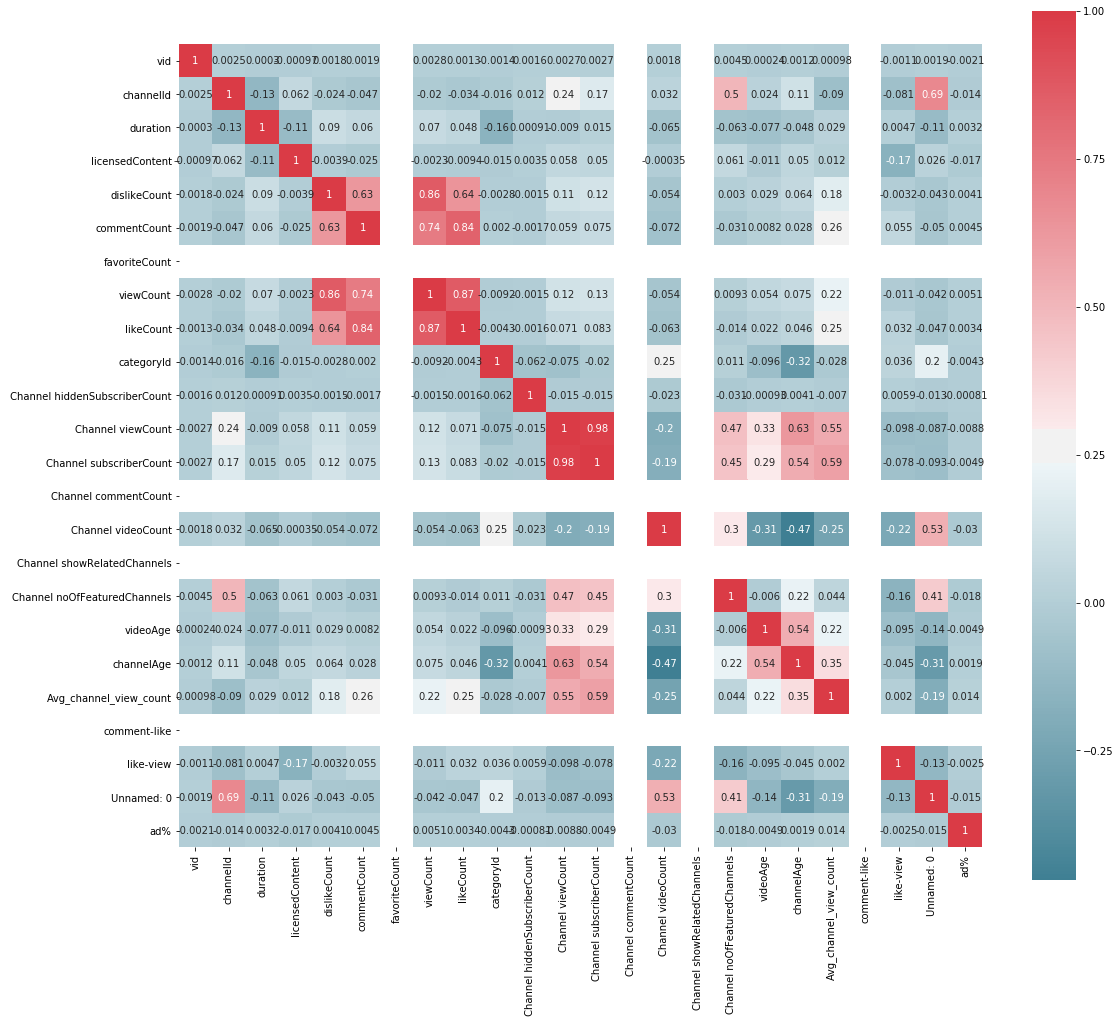

In [137]:
import seaborn as sns

f, ax = plt.subplots(figsize=(18, 16))
corr = data1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()